In [1]:
import numpy as np 
import pandas as pd


In [2]:
#import the dataset
df=pd.read_csv('Titanic-Train-Data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# what are the different types of missing values?

#### 1.Missing Completely at Random, MCAR:
When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. 

In [4]:
df.isnull().sum(),#so here age and cabin are MCAR['missing completely at random'].

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


#### 2.Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [23]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [6]:
#there fore the null value percentage in the cabin is
df['cabin_null'].mean()

0.7710437710437711

In [22]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [25]:
df=pd.read_csv('Titanic-Train-Data.csv',usecols=['Age','Fare','Survived'])

In [26]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
df.isnull().sum()

Survived       0
Age          177
Fare           0
Agemedian    177
dtype: int64

In [39]:
#to fill the values to that nan values.
def impute_nan(df,variable,median):
    df[variable+'median']=df[variable].fillna(value)

In [57]:
value=df['Age'].median()


In [58]:
value

28.0

In [59]:
impute_nan(df,'Age',value)
df.head()

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [60]:
#to check the standard devation of both features.
print(df['Age'].std(),df['Agemedian'].std())
df['Agemedian'].isnull().sum()

14.526497332334044 13.019696550973194


0

C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

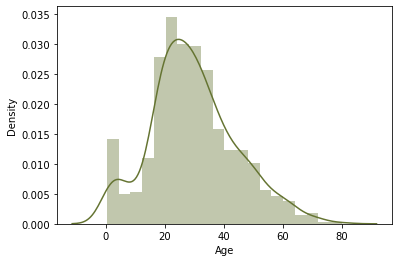

In [67]:
#now we will see the distributions.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(df['Age'],color='#657432')


C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Agemedian', ylabel='Density'>

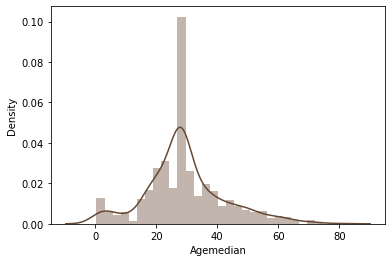

In [69]:
sns.distplot(df['Agemedian'],color='#654732')

#### Advantages And Disadvantages of Mean/Median Imputation
#### Advantages
1.Easy to implement(Robust to outliers)
2.Faster way to obtain the complete dataset
#### Disadvantages
1.Change or Distortion in the original variance
2.Impacts Correlation